## Homework #8

* Due on **Tuesday, April-9-2024**, before class (1pm)
* Please comment your code and upload the Jupyter notebook to the dropbox link provided in Moodle
* Q&A: Team or email


### Earth's orbit - pacemaker of the Ice Ages

In Lecture 16 and the corresponding in-class practice, we have looked at the time series of insulation for three key parameters of the earth orbit: the [_eccentricity_] (or ovalness of the orbit around the sun), the[_obliquity_] (tilt) of the spin axis and the [_precession_] of the spin axis.  You've also tried generate periodograms in order to find the characteristic frequencies for the three parameters - and you did find interesting frequencies in the periodograms, they are also known as "modes".

But how do we relate these modes to the variations in ice ages?  Glaciers tend to over-ride the evidence of their older siblings, so how do we know the timing and extent of past glaciations?  The answer is marine fossils. Marine fossils, like formainifera, are made of calcium carbonate and retain a record of the oxygen isotopic ratios of the sea water in which they live.  And "So?", you say.  What does that have to do with ice volume?   Here is the answer in a nutshell: 
- There are several isotopes of oxygen, two of which are fairly common $ {^{{18}}O}$ and $ {^{{16}}O}$  
- During evaporation, the lighter isotope is preferentially removed, leaving the water body enriched in the heavier isotope.  When the water condenses, the process is reversed- the heavier isotope is preferentially removed- so nothing should happen over time, right?  What goes up must come down.  But it isn't so simple.  
- Evaporation occurs mostly in the tropics (due to the temperature) and then the clouds move north raining and snowing out as they go.  This process results in an enrichment of the light oxygen isotopes in the snow and an enrichment of the heavier isotope in the sea water. This process is called _Rayleigh distillation_. The ratio of the two isotopes is a proxy of the volume of ice.  

We will need a measure of the isotopic ratios in foraminifera recovered from deep sea sediment cores and their DATES. The latter was done using magnetic stratigraphy (see, e.g., Shackleton and Opdyke, 1973, Quaternary Research, 3, 39-55, https://doi.org/10.1016/0033-5894(73)90052-5). A modern version of these data was published by Lisecki and Raymo (2005) called the LR04 stack.  This is a stack of 58 records of oxygen isotopic variations, several of which were independently dated using magnetostratigraphy, from all over the world's oceans. The data are cast as $\delta ^{18}O$, defined as: 

$$\delta ^{{18}}O={\Biggl (}{\frac  {{\bigl (}{\frac  {^{{18}}O}{^{{16}}O}}{\bigr )}_{{sample}}}{{\bigl (}{\frac  {^{{18}}O}{^{{16}}O}}{\bigr )}_{{standard}}}}-1{\Biggr )}*1000\ ^{{o}}\!/\!_{{oo}}$$

Let's consider only the last million years for the following analysis on the pace maker of the Earth's ice ages. Here we go:

- use the "INSOLN.LA2004.BTL.100.csv" dataset you've played in in-class practice, consider only the last million years (Age<1000 ka), find out the leading periodicities (modes) in _eccentricity_, _obliquity_ and _precession_ of the Earth's orbit (in ka). NOTE: each orbital data may have more than one mode.
- use the "LR04stack.csv" data, plot the "d18O" column (which is calculated using the above equation) up for the last million years.
- use a moving average method to remove variations faster than 5 ka in the d18O data, plot the smoothed d18O in a new figure. This is also called "massage the data". What happened to the "d18O" data after you "massaged" it? Why?
- generate a periodograms for the smoothed time series of d18O you've just created. **NOTE**: remove any "nan" in your smoothed column data before using the periodogram( ) function
- in the periodogram of d18O you've generated, label the frequency modes in Eccentricity, Obliquity and Precession you've found in the insulation data using **verticle lines**. You need to adjust your figure scale and axis limit etc. in order to highlight the frequency components that are physically meaningful
- label your figure with a title and a legend
- conclude you findings (this is 10% of the total grade).

-- task 1 --


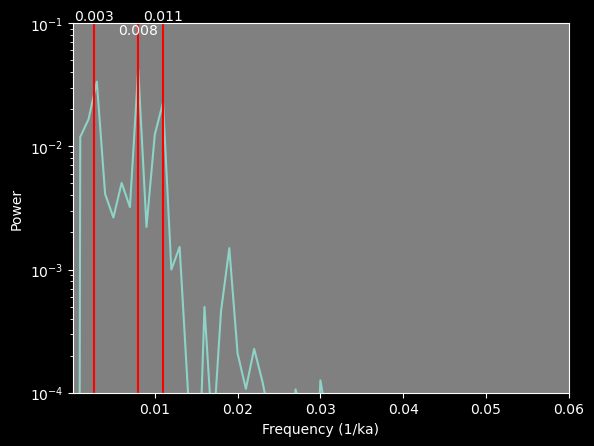

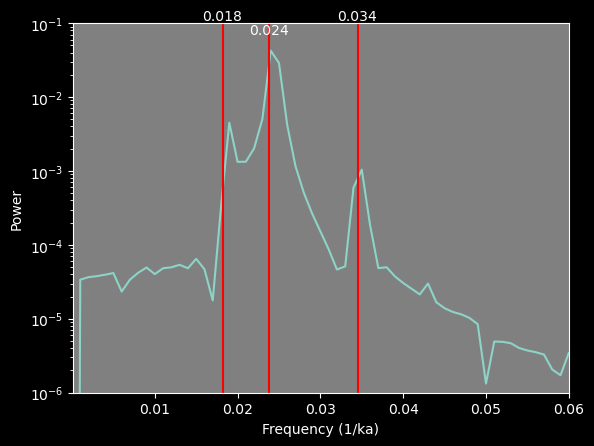

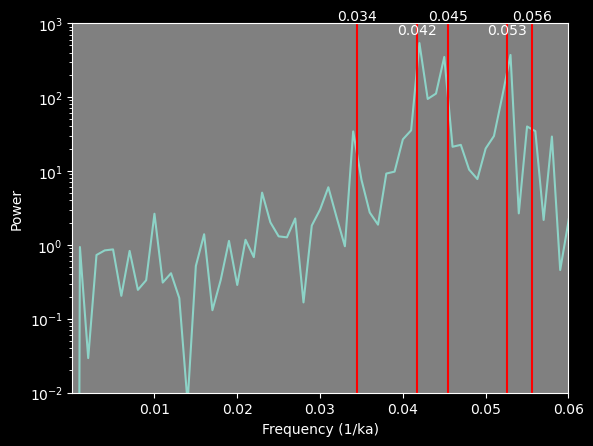

In [29]:
import pandas as pd
import numpy as np
import copy
from scipy import signal
import matplotlib.pyplot as plt


# -- task 1 --
print("-- task 1 --")
ice_age = pd.read_csv('./INSOLN.LA2004.BTL.100.csv')
ice_age =ice_age[ice_age['Age (ka)']<1000]

# 表述1：the characteristic frequencies for the three parameters
# 表述2：the leading periodicities (modes)
# 二者含义等价，也就是magnitude**2最大的 = magnitude最大的 = 原始公式中最突出的
""" 
-- 在频谱分析中，leading periodicities（主导周期性）指的是在频谱图中显示出最明显或最显著的周期性成分。
它们是频谱图中最高的峰值或最强的频率分量。
这些主导周期性代表了数据中最重要或最显著的周期性模式。
-- 即使周围的频率分量不强，如果某个频率分量在频谱图中表现得相对较强，它仍然可以被认为是一个主导周期性。
主导周期性并不一定意味着它是最强的频率分量，而是指在给定数据中显著且重要的周期性成分。
因此，如果某个频率分量在频谱图中相对较强，而周围的其他频率分量相对较弱，那么它仍然可以被认为是一个主导周期性。
"""

def plot_line(t,top=True,height=0.1):
    plt.axvline(x=1/t,color='red')  # use a vertical line
    if top :
        plt.text(1/t,height,"{0:.3f}".format(float(1/t)),ha='center',va='bottom')
    elif not top:
        plt.text(1/t,height,"{0:.3f}".format(float(1/t)),ha='center',va='top')

def leading_periodicities(pattern="Eccentricity"):
    # make an array out of the desired data series
    ecce = np.array(ice_age[pattern])
    time = np.array(ice_age['Age (ka)'])
    fs = 1/(time[1]-time[0])
    """ 
    【other feasible method to obtain frequency
    T_cadence = ice_age['Age (ka)'].iloc[1]-ice_age['Age (ka)'].iloc[0]
    F_frequency = 1/T_cadence
    """
    # and calculate the frequencies 
    freqs, power = signal.periodogram(ecce, fs)

    # plot on a linear x, log y plot (using semilogy( ))
    plt.rcParams['axes.facecolor'] = 'gray'
    plt.semilogy(freqs, power) 
    #zipped_two = list(zip(freqs, power))
    #zipped_two.sort(key=lambda x:x[1], reverse=True)
    #peak_fre = [item[0] for item in zipped_two[:3]]

    limitation = {"Eccentricity":(.0001,.1),"Obliquity":(1e-6,.1),"Precession":(1e-2,1e3)}

    plt.ylim(limitation[pattern][0],limitation[pattern][1]) # truncate the Y axis 
    plt.xlim(.0001,.06) # truncate the X axis

    
    plt.xlabel('Frequency (1/ka)') # label the axes
    plt.ylabel('Power')
    #for item in peak_fre:
    if pattern == "Eccentricity":
        t=91;plot_line(t,True)
        t=125;plot_line(t,False)
        t=380;plot_line(t,True)
    elif pattern == "Obliquity":
        t=55;plot_line(t,True)
        t=42;plot_line(t,False)
        t=29;plot_line(t,True)
    else:
        t=29;plot_line(t,True,1e3)
        t=24;plot_line(t,False,1e3)
        t=22;plot_line(t,True,1e3)
        t=19;plot_line(t,False,1e3)
        t=18;plot_line(t,True,1e3)
    plt.show()

leading_periodicities(pattern="Eccentricity")
leading_periodicities(pattern="Obliquity")
leading_periodicities(pattern="Precession")

- use the "LR04stack.csv" data, plot the "d18O" column (which is calculated using the above equation) up for the last million years.
- use a moving average method to remove variations faster than 5 ka in the d18O data, plot the smoothed d18O in a new figure. This is also called "massage the data". What happened to the "d18O" data after you "massaged" it? Why?
- generate a periodograms for the smoothed time series of d18O you've just created. **NOTE**: remove any "nan" in your smoothed column data before using the periodogram( ) function
- in the periodogram of d18O you've generated, label the frequency modes in Eccentricity, Obliquity and Precession you've found in the insulation data using **verticle lines**. You need to adjust your figure scale and axis limit etc. in order to highlight the frequency components that are physically meaningful
- label your figure with a title and a legend
- conclude you findings (this is 10% of the total grade).

-- task 2 --


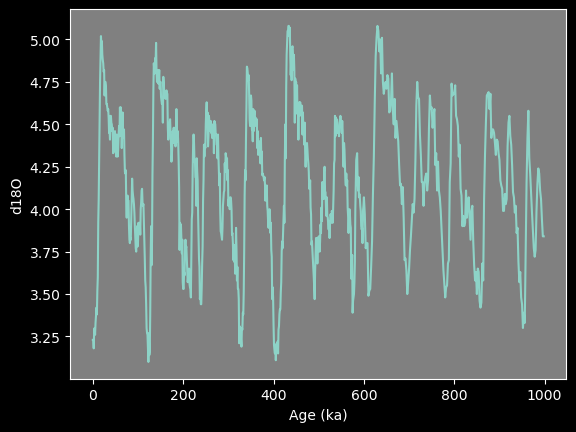

-- task 3 --


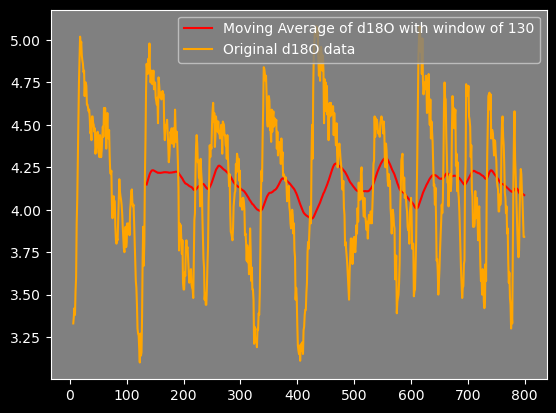

 
This pattern shows a process of the formation and subsequent melting of glaciers, causing a fluctuation 
of isotope ratio. When glacier is forming, equaling to when water is condensing,
the heavier isotope is preferentially removed. Otherwise, the lighter isotope is removed when glacier is 
melting. 
Thus, this cycle causes the fluctuation of isotope ratio.

-- task 4 --


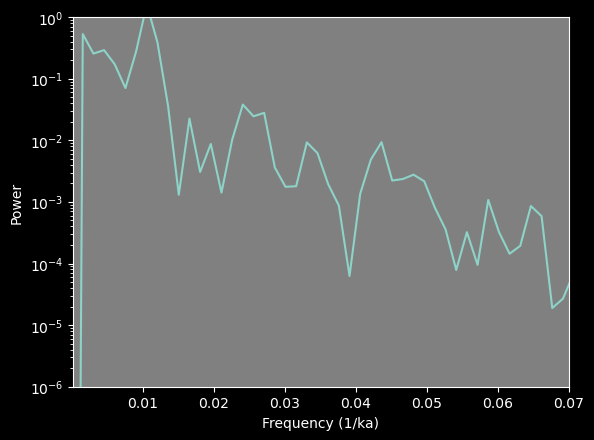

-- task 5 --


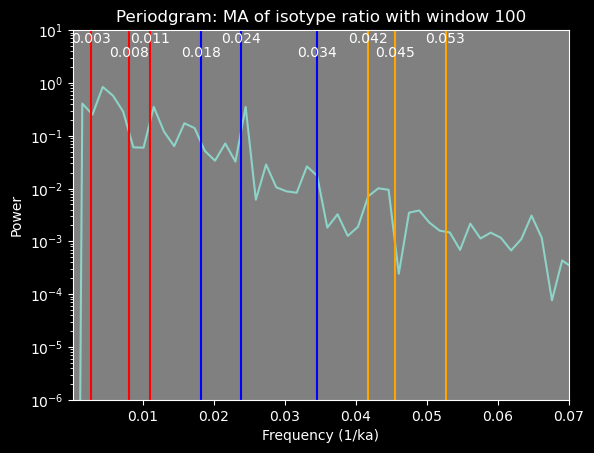

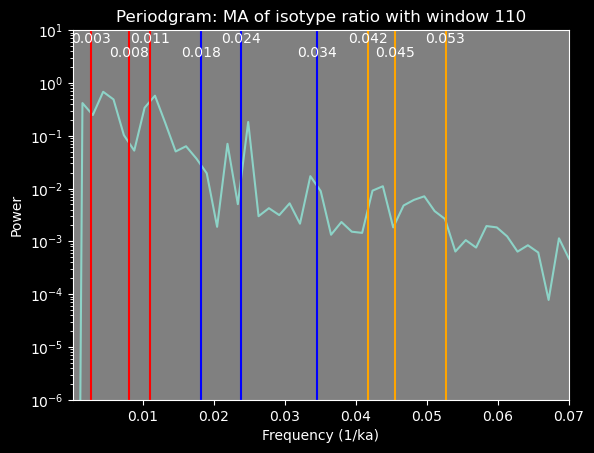

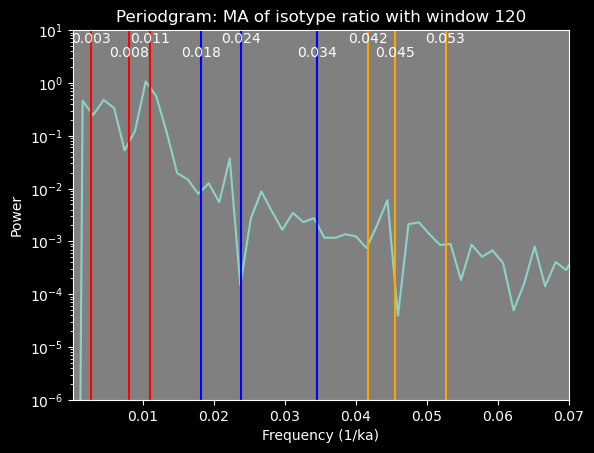

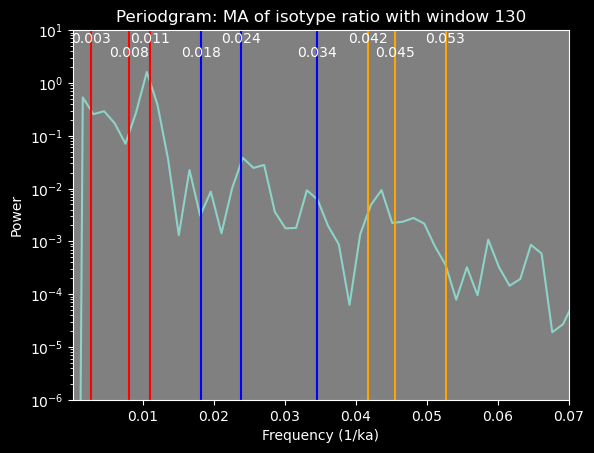

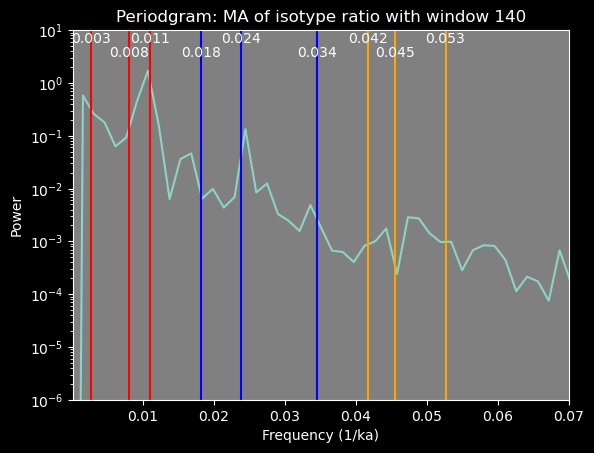

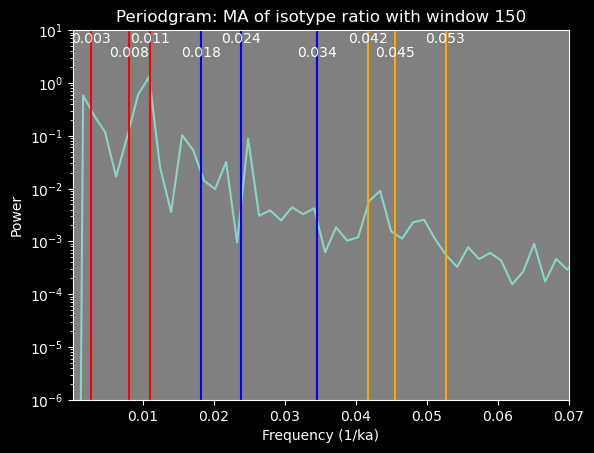

 
Due to the ambiguous cycle of the fluctuation of isotope ratio, I need to attempt  
several MA windows. As a result, I observe when I used MA windows of 130, 
the smoothed data posseses a relative stable and periodic change (showing in task 3).
Meanwhile, in task 5, existing leading periodicities fits the new image well,
when using MA window of 130.
Hence, it can be conclude that the glacier forming and melting cycle is approximately 
130 ka (130,000) years!



In [91]:
# -- task 2 --
print("-- task 2 --")
LR = pd.read_csv('./LR04stack.csv')
LR = LR[LR['Age (ka)']<1000]
plt.plot(LR['Age (ka)'],LR["d18O"])
plt.xlabel("Age (ka)")
plt.ylabel("d18O")
plt.show()

## -- task 3 -- 
print("-- task 3 --")
LR_r = pd.read_csv('./LR04stack.csv')
LR_r = LR_r[(LR_r['Age (ka)']< 1000) & (LR_r['Age (ka)']>5)]
LR_r["d18O_M"] = LR_r["d18O"].rolling(130).mean()
LR_r["d18O_M"].plot(color='r',label="Moving Average of d18O with window of 130")
LR_r["d18O"].plot(color='orange',label='Original d18O data')
plt.legend()
plt.show()
string = """ 
This pattern shows a process of the formation and subsequent melting of glaciers, causing a fluctuation 
of isotope ratio. When glacier is forming, equaling to when water is condensing,
the heavier isotope is preferentially removed. Otherwise, the lighter isotope is removed when glacier is 
melting. 
Thus, this cycle causes the fluctuation of isotope ratio.
"""
print(string)

## -- task 4 -- 
print("-- task 4 --")
LR_r = LR_r.dropna()
value = np.array(LR_r["d18O_M"])
time = np.array(LR_r['Age (ka)'])
fs = 1/(time[1]-time[0])
freqs, power = signal.periodogram(value, fs)

plt.rcParams['axes.facecolor'] = 'gray'
plt.semilogy(freqs, power) 

plt.xlim(.0001,.07) # truncate the X axis
plt.ylim(1e-6,1)
plt.xlabel('Frequency (1/ka)') # label the axes
plt.ylabel('Power')
plt.show()

## -- task 5 --
print("-- task 5 --")
def plot_line(t,top=True,color_c="red"):
    plt.axvline(x=1/t,color=color_c)  # use a vertical line
    if top :
        plt.text(1/t,5,"{0:.3f}".format(float(1/t)),ha='center',va='bottom')
    elif not top:
        plt.text(1/t,5,"{0:.3f}".format(float(1/t)),ha='center',va='top')


t = [380,125,91,55,42,29,24,22,19,18]
color_list=['r','r','r','b','b','b','orange','orange','orange']
value_color = list(zip(t,color_list))

def per_win(window):
    window_c = window 
    LR_r = pd.read_csv('./LR04stack.csv')
    LR_r = LR_r[(LR_r['Age (ka)']< 1000) & (LR_r['Age (ka)']>5)]
    LR_r["d18O_M"] = LR_r["d18O"].rolling(window_c).mean()
    LR_r = LR_r.dropna()
    value = np.array(LR_r["d18O_M"])
    time = np.array(LR_r['Age (ka)'])
    fs = 1/(time[1]-time[0])
    freqs, power = signal.periodogram(value, fs)
    plt.rcParams['axes.facecolor'] = 'gray'
    plt.semilogy(freqs, power) 

    plt.xlim(.0001,.07) # truncate the X axis
    plt.ylim(1e-6,10)
    plt.xlabel('Frequency (1/ka)') # label the axes
    plt.ylabel('Power')
    plt.title("Periodgram: MA of isotype ratio with window {0}".format(window_c))

    sum=0
    for item,color_c in value_color:
        if sum%2 == 0:
            plot_line(item,top=True,color_c=color_c)
        else:
            plot_line(item,top=False,color_c=color_c)
        sum += 1
    plt.show()
    

win_list = [100,110,120,130,140,150]
for item in win_list:
    per_win(item)
# BUG: 必须把zip对象转换成list，zip对象
# 如果迭代完成不会再迭代了，next指针也不会重置到第一位

Conclusion = """ 
Due to the ambiguous cycle of the fluctuation of isotope ratio, I need to attempt  
several MA windows. As a result, I observe when I used MA windows of 130, 
the smoothed data posseses a relative stable and periodic change (showing in task 3).
Meanwhile, in task 5, existing leading periodicities fits the new image well,
when using MA window of 130.
Hence, it can be conclude that the glacier forming and melting cycle is approximately 
130 ka (130,000) years!
"""
print(Conclusion)
